
# Collaborative Filtering Using Deep Learning

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Flatten, Dot, Dense
from tensorflow.keras.models import Model
import numpy as np
import tensorflow as tf
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Flatten, Dot, Dense
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import process
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import numpy as np
import tensorflow as tf
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from main import DLPreprocessing, DLModeling, DLEvaluation, HDLPreprocessing, HDLModeling, HDLContentBasedFiltering, HDLEvaluation, HybridRecommendation


In [21]:
 # Preprocessing
filepath = 'data/cleaned-data.csv'

dl_preprocessing = DLPreprocessing(filepath)
data = dl_preprocessing.load_data()
train_data, test_data = dl_preprocessing.preprocess_data()


In [22]:
filepath = 'data/cleaned-data.csv'

dl_modeling = DLModeling(dl_preprocessing.user_count, dl_preprocessing.movie_count)
dl_modeling.build_model()
dl_modeling.train_model(train_data)


Epoch 1/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1274 - root_mean_squared_error: 0.3485 - val_loss: 9.4970e-04 - val_root_mean_squared_error: 0.0308
Epoch 2/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.2346e-04 - root_mean_squared_error: 0.0249 - val_loss: 4.5302e-04 - val_root_mean_squared_error: 0.0213
Epoch 3/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.1479e-04 - root_mean_squared_error: 0.0146 - val_loss: 3.0487e-04 - val_root_mean_squared_error: 0.0175
Epoch 4/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.7538e-04 - root_mean_squared_error: 0.0132 - val_loss: 3.1082e-04 - val_root_mean_squared_error: 0.0176
Epoch 5/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.2190e-04 - root_mean_squared_error: 0.0149 - val_loss: 3.0449e-04 - val_root_mean_squared_error: 0.0174
Epoch 6/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.5221e-04 - root_mean_squared_error: 0.0159 - val_loss: 2.7233e-04 - val_root_mean_squared_error: 0.0

631/631 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
RMSE: 0.017991559579968452, MAE: 0.012457380071282387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23

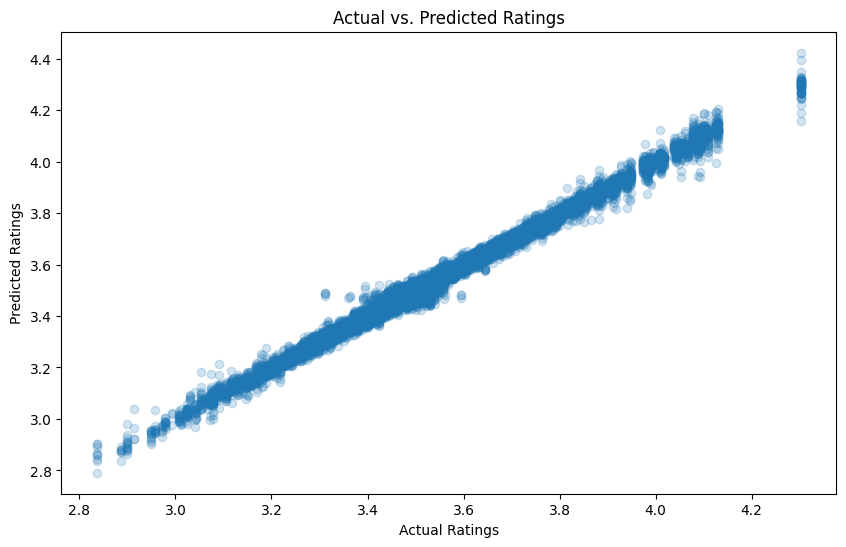

631/631 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


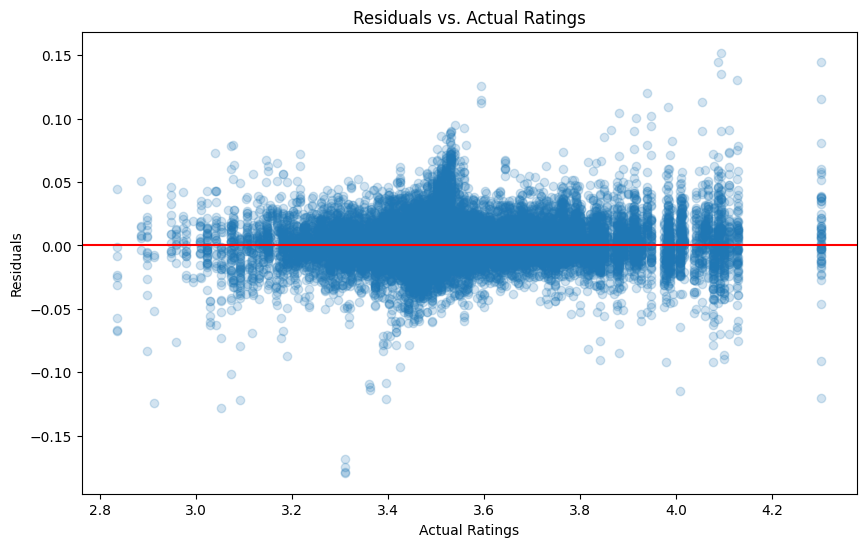

In [23]:
filepath = 'data/cleaned-data.csv'

# Evaluation
dl_evaluation = DLEvaluation(dl_modeling.get_model(), test_data, dl_preprocessing.scaler)
dl_evaluation.evaluate_model()
map_k = dl_evaluation.mean_average_precision(k=5)
ndcg_k = dl_evaluation.normalized_discounted_cumulative_gain(k=5)

print(f'MAP@5: {map_k}, NDCG@5: {ndcg_k}')

# Visualizations
dl_evaluation.plot_actual_vs_predicted()
dl_evaluation.plot_residuals()

In [24]:
filepath = 'data/cleaned-data.csv'

# User input for recommendations
user_id = int(input("Enter userId for recommendations: "))
top_k_movie_indices, top_k_ratings = dl_modeling.recommend_movies(user_id, top_k=5)
    
    # Display top 5 recommended movies
movie_titles = data[['movieId', 'title']].drop_duplicates().set_index('movieId').loc[top_k_movie_indices]['title']
for i, (title, rating) in enumerate(zip(movie_titles, top_k_ratings), 1):
        print(f"{i}: {title} with predicted rating {rating:.2f}")

304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
1: Shawshank Redemption, The with predicted rating 0.97
2: Godfather, The with predicted rating 0.85
3: Fight Club with predicted rating 0.85
4: Pulp Fiction with predicted rating 0.84
5: Schindler's List with predicted rating 0.84


## Hybrid Approach

In [25]:
filepath = 'data/cleaned-data.csv'

# Preprocessing
hdl_preprocessing = HDLPreprocessing(filepath)
data = hdl_preprocessing.load_data()
train_data, test_data, movie_tfidf_matrix = hdl_preprocessing.preprocess_data()

In [26]:
filepath = 'data/cleaned-data.csv'
# Collaborative Filtering Modeling
hdl_modeling = HDLModeling(hdl_preprocessing.user_count, hdl_preprocessing.movie_count)
hdl_modeling.build_model()
hdl_modeling.train_model(train_data, epochs=10, batch_size=64)
cf_model = hdl_modeling.get_model()

Epoch 1/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.1279 - root_mean_squared_error: 0.3491 - val_loss: 8.2913e-04 - val_root_mean_squared_error: 0.0288
Epoch 2/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5.5818e-04 - root_mean_squared_error: 0.0235 - val_loss: 4.0087e-04 - val_root_mean_squared_error: 0.0200
Epoch 3/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.9577e-04 - root_mean_squared_error: 0.0140 - val_loss: 2.7715e-04 - val_root_mean_squared_error: 0.0166
Epoch 4/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1.6967e-04 - root_mean_squared_error: 0.0130 - val_loss: 2.9578e-04 - val_root_mean_squared_error: 0.0172
Epoch 5/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 2.0340e-04 - root_mean_squared_error: 0.0143 - val_loss: 2.6388e-04 - val_root_mean_squared_error: 0.0162
Epoch 6/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 2.2614e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.5392e-04 - val_root_mean_squared_error: 0

In [27]:
filepath = 'data/cleaned-data.csv'

# Content-Based Filtering for Cold Start
hdl_cb_filtering = HDLContentBasedFiltering(movie_tfidf_matrix, data)

631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
RMSE: 0.0181171465665102, MAE: 0.012419202364981174
631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


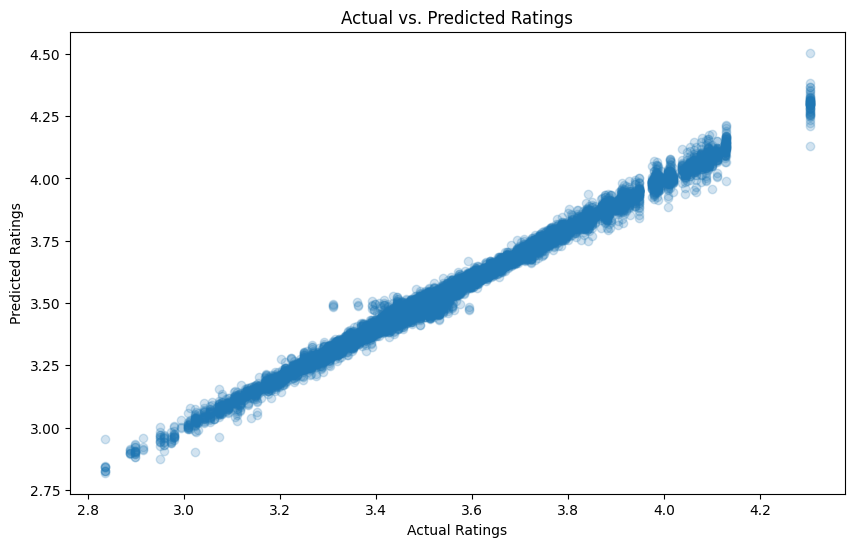

631/631 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


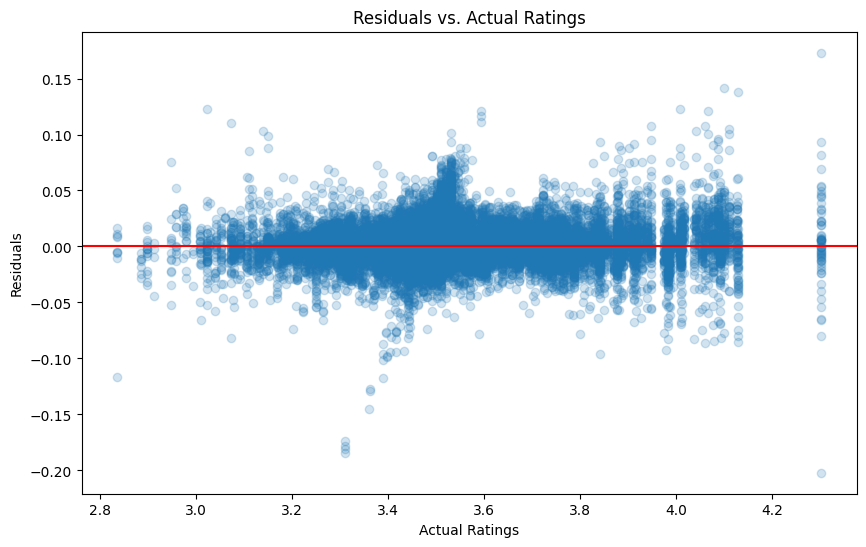

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

In [28]:
filepath = 'data/cleaned-data.csv'


# Evaluation
hdl_evaluation = HDLEvaluation(cf_model, test_data, hdl_preprocessing.scaler)
hdl_evaluation.evaluate_model()
hdl_evaluation.plot_actual_vs_predicted()
hdl_evaluation.plot_residuals()
map_k = hdl_evaluation.mean_average_precision()
ndcg_k = hdl_evaluation.normalized_discounted_cumulative_gain()
print(f'Mean Average Precision (MAP): {map_k}')
print(f'Normalized Discounted Cumulative Gain (NDCG): {ndcg_k}')

In [29]:

if __name__ == '__main__':
    # Filepath to the CSV file
    filepath = 'data/cleaned-data.csv'

    # Preprocessing
    hdl_preprocessing = HDLPreprocessing(filepath)
    data = hdl_preprocessing.load_data()
    train_data, test_data, movie_tfidf_matrix = hdl_preprocessing.preprocess_data()

    # Collaborative Filtering Modeling
    hdl_modeling = HDLModeling(hdl_preprocessing.user_count, hdl_preprocessing.movie_count)
    hdl_modeling.build_model()
    hdl_modeling.train_model(train_data, epochs=10, batch_size=64)
    cf_model = hdl_modeling.get_model()

    # Content-Based Filtering for Cold Start
    hdl_cb_filtering = HDLContentBasedFiltering(movie_tfidf_matrix, data)

    # Hybrid Recommendation System
    hybrid_recommender = HybridRecommendation(cf_model, hdl_cb_filtering, data, movie_tfidf_matrix)

    # User input
    choice = input("Enter 'u' for user-based recommendation or 'm' for movie-based recommendation: ").strip().lower()
    if choice == 'u':
        user_id = int(input("Enter User ID: "))
        recommendations, scores = hybrid_recommender.recommend(user_id=user_id, top_k=5)
        print("Top 5 recommendations for User ID", user_id)
        for i, (movie, score) in enumerate(zip(recommendations, scores), 1):
            print(f"{i}. {movie} - Predicted Rating: {score}")
    elif choice == 'm':
        movie_title = input("Enter Movie Title: ").strip()
        recommendations, scores = hybrid_recommender.recommend(movie_title=movie_title, top_k=5)
        print("Top 5 recommendations for Movie Title", movie_title)
        for i, (movie, score) in enumerate(zip(recommendations, scores), 1):
            print(f"{i}. {movie} - Similarity Score: {score[1]}")
    else:
        print("Invalid choice. Please enter 'u' or 'm'.")


Epoch 1/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1252 - root_mean_squared_error: 0.3456 - val_loss: 9.6099e-04 - val_root_mean_squared_error: 0.0310
Epoch 2/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 6.7493e-04 - root_mean_squared_error: 0.0259 - val_loss: 5.0139e-04 - val_root_mean_squared_error: 0.0224
Epoch 3/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3592e-04 - root_mean_squared_error: 0.0154 - val_loss: 3.4363e-04 - val_root_mean_squared_error: 0.0185
Epoch 4/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.8658e-04 - root_mean_squared_error: 0.0137 - val_loss: 3.4860e-04 - val_root_mean_squared_error: 0.0187
Epoch 5/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 2.3401e-04 - root_mean_squared_error: 0.0153 - val_loss: 3.3318e-04 - val_root_mean_squared_error: 0.0183
Epoch 6/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 2.8107e-04 - root_mean_squared_error: 0.0168 - val_loss: 2.7354e-04 - val_root_mean_squared_error: 0